<a href="https://colab.research.google.com/github/alfanardi/Anomaly-Prediction/blob/main/EDA_DPIv1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [6]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv('/content/gdrive/My Drive/Collaboration Goog/dpi_fraud_daily_flag_202102010933.csv')
df.head()

,event_date,msisdn,service_name,provinsi,quota_name,price_plan_id,price_plan,old_account_balance,old_account_consumption,rxipv4,rxipv6,transaction_id,pckg_id,chnl_id,l1_payu,commercial_name,accessed_category,accessed_app,quota_usage_upcc,quota_consumption_upcc,quota_balance_upcc,old_quota_consumption_upcc,old_quota_balance_upcc,accumulation_value_upcc,accumulation_balance_upcc,accumulation_consumption_upcc,old_accumulation_value_upcc,old_accumulation_balance_upcc,old_accumulation_consumption_upcc,quota_value_upcc,transfer_quota_balance_upcc,transfer_quota_consumption_upcc,quota_value_ifrs_upcc,quota_consumption_ifrs_upcc,quota_balance_ifrs_upcc,quota_usage_ifrs_upcc,rev_per_usage_upcc,unit_price_upcc,tether,payload_aplikasi_bcp,flag,hits,domain,ip_destination,is_new,kpi_data_volume_total_bytes
0,2020-12-02,628111698256,VBDPI_B2B_PendidikanMBJJ_std,BANTEN,Q_VBDPI_B2B_PendidikanMBJJ_std,18592,PP New HaloFit 1,0.0,0.0,NaN,NaN,NaN,-838F-DB66474,NaN,NQ,NQ,Communications,WhatsApp,2349444,31126164,1478823276,0,0,0,0,0,0,0,0,1509949440,0,0,1.509949e+09,0,0,0,0.0,0.0,0,7.219152e+09,0,0,NaN,NaN,NaN,NaN
1,2020-12-02,628112051411,VBDPI_B2B_PendidikanMBJJ_std,JAWA BARAT,Q_VBDPI_B2B_PendidikanMBJJ_std,2427,KartuHALO Bebas Abonemen v2,0.0,0.0,NaN,NaN,NaN,-8BEA-AA957E7,NaN,NQ,NQ,Communications,Zoom,4110584,234786344,2879484376,0,0,0,0,0,0,0,0,3114270720,0,0,3.114271e+09,0,0,0,0.0,0.0,1,3.573171e+09,0,0,NaN,NaN,NaN,NaN
2,2020-12-02,6281227916254,VBDPI_B2B_PendidikanMBJJ_std,JAWA TENGAH,Q_VBDPI_B2B_PendidikanMBJJ_std,3727844,PP simPATI Entertainment,0.0,0.0,NaN,NaN,NaN,-8B81-9774420,NaN,NQ,NQ,Communications,WhatsApp,2510854,39879985,1092582095,0,0,0,0,0,0,0,0,1132462080,0,0,1.132462e+09,0,0,0,0.0,0.0,0,5.929023e+09,0,0,NaN,178.128.80.215,False,16212.0
3,2020-12-02,62811209549,VBDPI_B2B_PendidikanMBJJ_std,JAWA BARAT,Q_VBDPI_B2B_PendidikanMBJJ_std,2437,KartuHALO Corporate Business,0.0,0.0,NaN,NaN,NaN,-89CB-BC0EC99,NaN,NQ,NQ,CloudStorage,iCloud,2452464,1694439193,17840531687,0,0,0,0,0,0,0,0,19534970880,0,0,1.953497e+10,0,0,0,0.0,0.0,1,2.429830e+09,0,0,NaN,NaN,NaN,NaN
4,2020-12-02,628112120990,VBDPI_B2B_PendidikanMBJJ_std,JAWA BARAT,Q_VBDPI_B2B_PendidikanMBJJ_std,18592,PP New HaloFit 1,0.0,0.0,NaN,NaN,NaN,-943C-53B7276,NaN,NQ,NQ,Communications,STUN,2211441,190199707,1005176933,0,0,0,0,0,0,0,0,1195376640,0,0,1.195377e+09,0,0,0,0.0,0.0,1,2.151447e+09,0,0,NaN,NaN,NaN,NaN


In [8]:
print("Data columns:{}".format(df.columns))
print("Data shape :{}".format(df.shape))

Data columns:Index(['event_date', 'msisdn', 'service_name', 'provinsi', 'quota_name',
       'price_plan_id', 'price_plan', 'old_account_balance',
       'old_account_consumption', 'rxipv4', 'rxipv6', 'transaction_id',
       'pckg_id', 'chnl_id', 'l1_payu', 'commercial_name', 'accessed_category',
       'accessed_app', 'quota_usage_upcc', 'quota_consumption_upcc',
       'quota_balance_upcc', 'old_quota_consumption_upcc',
       'old_quota_balance_upcc', 'accumulation_value_upcc',
       'accumulation_balance_upcc', 'accumulation_consumption_upcc',
       'old_accumulation_value_upcc', 'old_accumulation_balance_upcc',
       'old_accumulation_consumption_upcc', 'quota_value_upcc',
       'transfer_quota_balance_upcc', 'transfer_quota_consumption_upcc',
       'quota_value_ifrs_upcc', 'quota_consumption_ifrs_upcc',
       'quota_balance_ifrs_upcc', 'quota_usage_ifrs_upcc',
       'rev_per_usage_upcc', 'unit_price_upcc', 'tether',
       'payload_aplikasi_bcp', 'flag', 'hits', 'domain',

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22406 entries, 0 to 22405
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         22406 non-null  object 
 1   msisdn                             22406 non-null  int64  
 2   service_name                       22406 non-null  object 
 3   provinsi                           22406 non-null  object 
 4   quota_name                         22406 non-null  object 
 5   price_plan_id                      22406 non-null  int64  
 6   price_plan                         22406 non-null  object 
 7   old_account_balance                22406 non-null  float64
 8   old_account_consumption            22406 non-null  float64
 9   rxipv4                             0 non-null      float64
 10  rxipv6                             0 non-null      float64
 11  transaction_id                     0 non-null      flo

In [10]:
df.isnull().sum()

event_date                               0
msisdn                                   0
service_name                             0
provinsi                                 0
quota_name                               0
price_plan_id                            0
price_plan                               0
old_account_balance                      0
old_account_consumption                  0
rxipv4                               22406
rxipv6                               22406
transaction_id                       22406
pckg_id                                  0
chnl_id                              22406
l1_payu                                  0
commercial_name                          0
accessed_category                        0
accessed_app                             0
quota_usage_upcc                         0
quota_consumption_upcc                   0
quota_balance_upcc                       0
old_quota_consumption_upcc               0
old_quota_balance_upcc                   0
accumulatio

In [11]:
a = ['rxipv4', 'rxipv6', 'transaction_id','chnl_id','is_new','domain','ip_destination']
df.drop(a, inplace=True, axis=1)

In [12]:
df['kpi_data_volume_total_bytes'] = df['kpi_data_volume_total_bytes'].fillna((df['kpi_data_volume_total_bytes'].mean()))

In [13]:
df['quota_value_ifrs_upcc'] = df['quota_value_ifrs_upcc'].fillna((df['quota_value_ifrs_upcc'].mean()))

In [14]:
df.describe()

,msisdn,price_plan_id,old_account_balance,old_account_consumption,quota_usage_upcc,quota_consumption_upcc,quota_balance_upcc,old_quota_consumption_upcc,old_quota_balance_upcc,accumulation_value_upcc,accumulation_balance_upcc,accumulation_consumption_upcc,old_accumulation_value_upcc,old_accumulation_balance_upcc,old_accumulation_consumption_upcc,quota_value_upcc,transfer_quota_balance_upcc,transfer_quota_consumption_upcc,quota_value_ifrs_upcc,quota_consumption_ifrs_upcc,quota_balance_ifrs_upcc,quota_usage_ifrs_upcc,rev_per_usage_upcc,unit_price_upcc,tether,payload_aplikasi_bcp,flag,hits,kpi_data_volume_total_bytes
count,2.240600e+04,2.240600e+04,22406.0,22406.0,2.240600e+04,2.240600e+04,2.240600e+04,22406.0,22406.0,22406.0,22406.0,22406.0,22406.0,22406.0,22406.0,2.240600e+04,22406.0,22406.0,2.240600e+04,22406.0,22406.0,22406.0,22406.000000,22406.000000,22406.000000,2.240600e+04,22406.000000,22406.000000,2.240600e+04
mean,5.893212e+12,3.022727e+06,0.0,0.0,5.645462e+06,1.304870e+10,3.515713e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.646200e+11,0.0,0.0,7.440214e+10,0.0,0.0,0.0,173.175702,0.004013,0.168705,4.804258e+09,0.434348,0.434348,9.734813e+08
std,1.448797e+12,1.195705e+06,0.0,0.0,6.276748e+06,1.001193e+11,9.378087e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.572666e+11,0.0,0.0,7.742129e+10,0.0,0.0,0.0,483.889110,0.026618,0.374499,6.080640e+09,0.495682,0.495682,3.172894e+09
min,6.281110e+10,3.720000e+02,0.0,0.0,2.097156e+06,6.144034e+06,1.166120e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.174405e+08,0.0,0.0,1.174405e+08,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.147542e+09,0.000000,0.000000,4.070000e+02
25%,6.281211e+12,3.458714e+06,0.0,0.0,2.902042e+06,5.873562e+08,4.601094e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.818626e+10,0.0,0.0,4.818626e+10,0.0,0.0,0.0,11.366090,0.000223,0.000000,2.593263e+09,0.000000,0.000000,5.201770e+05
50%,6.281259e+12,3.462854e+06,0.0,0.0,3.979024e+06,2.422505e+09,1.532078e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610613e+11,0.0,0.0,7.440214e+10,0.0,0.0,0.0,37.254438,0.001218,0.000000,3.278428e+09,0.000000,0.000000,9.734813e+08
75%,6.282175e+12,3.462854e+06,0.0,0.0,6.174574e+06,7.529024e+09,3.878294e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.962107e+11,0.0,0.0,7.440214e+10,0.0,0.0,0.0,204.791522,0.004605,0.000000,4.860865e+09,1.000000,1.000000,9.734813e+08
max,6.285399e+12,1.109129e+07,0.0,0.0,1.137607e+08,2.588345e+12,2.110627e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.112158e+13,0.0,0.0,1.805937e+12,0.0,0.0,0.0,23980.927885,2.396887,1.000000,1.068387e+11,1.000000,1.000000,9.716015e+10


In [15]:
b = ['old_account_balance', 'old_account_consumption', 'old_quota_consumption_upcc','old_quota_balance_upcc','accumulation_value_upcc','accumulation_balance_upcc','accumulation_consumption_upcc','old_accumulation_value_upcc','old_accumulation_balance_upcc','old_accumulation_consumption_upcc','transfer_quota_balance_upcc','transfer_quota_consumption_upcc','quota_consumption_ifrs_upcc','quota_balance_ifrs_upcc','quota_usage_ifrs_upcc']
df.drop(b, inplace=True, axis=1)

In [16]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gridspec

In [17]:
df.event_date

0        2020-12-02
1        2020-12-02
2        2020-12-02
3        2020-12-02
4        2020-12-02
            ...    
22401    2020-12-01
22402    2020-12-01
22403    2020-12-01
22404    2020-12-01
22405    2020-12-01
Name: event_date, Length: 22406, dtype: object

In [18]:
timedelta = pd.to_datetime(df['event_date'],)

Distribuition of Non(0) and Frauds(1): 
0    12674
1     9732
Name: flag, dtype: int64


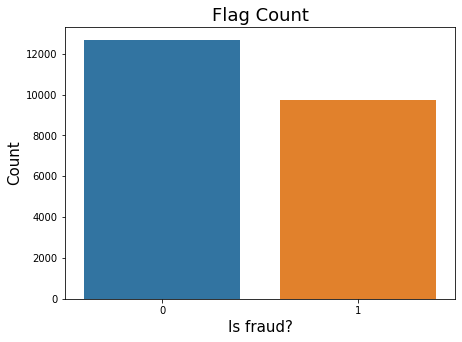

In [19]:
print("Distribuition of Non(0) and Frauds(1): ")
print(df["flag"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df['flag'])
plt.title("Flag Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [20]:
#To clearly the data of frauds and no frauds
df_fraud = df[df['flag'] == 1]
df_normal = df[df['flag'] == 0]

print("Fraud transaction statistics")
print(df_fraud['kpi_data_volume_total_bytes'].describe())
print("\nNormal transaction statistics")
print(df_normal['kpi_data_volume_total_bytes'].describe())


Fraud transaction statistics
count    9.732000e+03
mean     1.227451e+09
std      4.597619e+09
min      4.070000e+02
25%      2.296315e+05
50%      6.413811e+07
75%      9.734813e+08
max      9.716015e+10
Name: kpi_data_volume_total_bytes, dtype: float64

Normal transaction statistics
count    1.267400e+04
mean     7.784655e+08
std      1.216433e+09
min      4.620000e+02
25%      1.228098e+06
50%      9.734813e+08
75%      9.734813e+08
max      6.631586e+10
Name: kpi_data_volume_total_bytes, dtype: float64


In [21]:
df['volume_log'] = np.log(df.kpi_data_volume_total_bytes + 0.01)

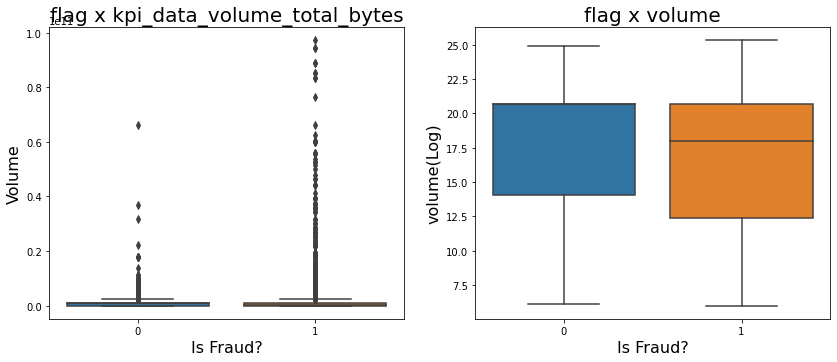

In [22]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ='flag',y='kpi_data_volume_total_bytes',
                 data=df)
ax.set_title("flag x kpi_data_volume_total_bytes", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Volume", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ='flag',y="volume_log", data=df)
ax1.set_title("flag x volume", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("volume(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

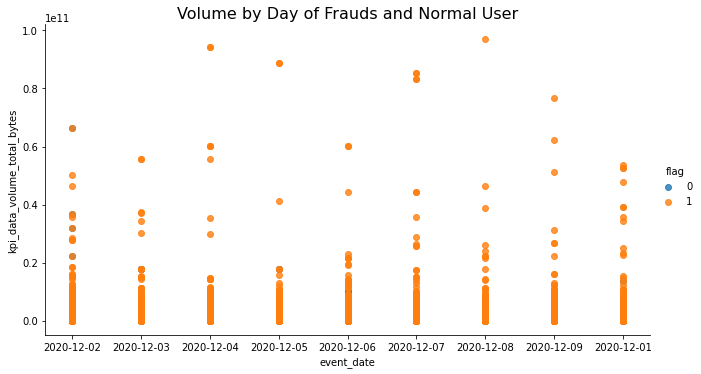

In [23]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="kpi_data_volume_total_bytes", x="event_date", fit_reg=False,aspect=1.8,
                data=df, hue='flag')
plt.title("Volume by Day of Frauds and Normal User",fontsize=16)
plt.show()

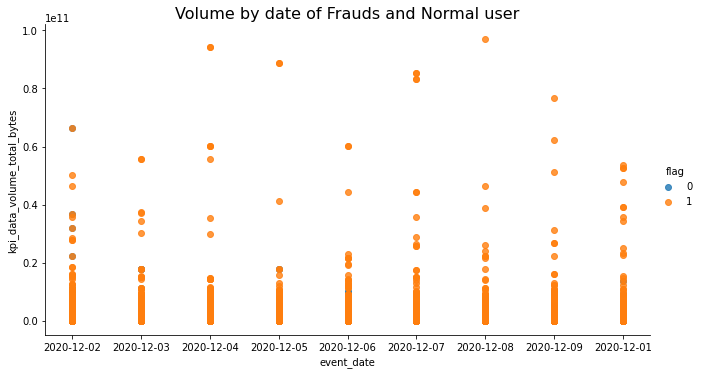

In [24]:
ax = sns.lmplot(y="kpi_data_volume_total_bytes", x="event_date", fit_reg=False,aspect=1.8,
                data=df, hue='flag')
plt.title("Volume by date of Frauds and Normal user", fontsize=16)

plt.show()


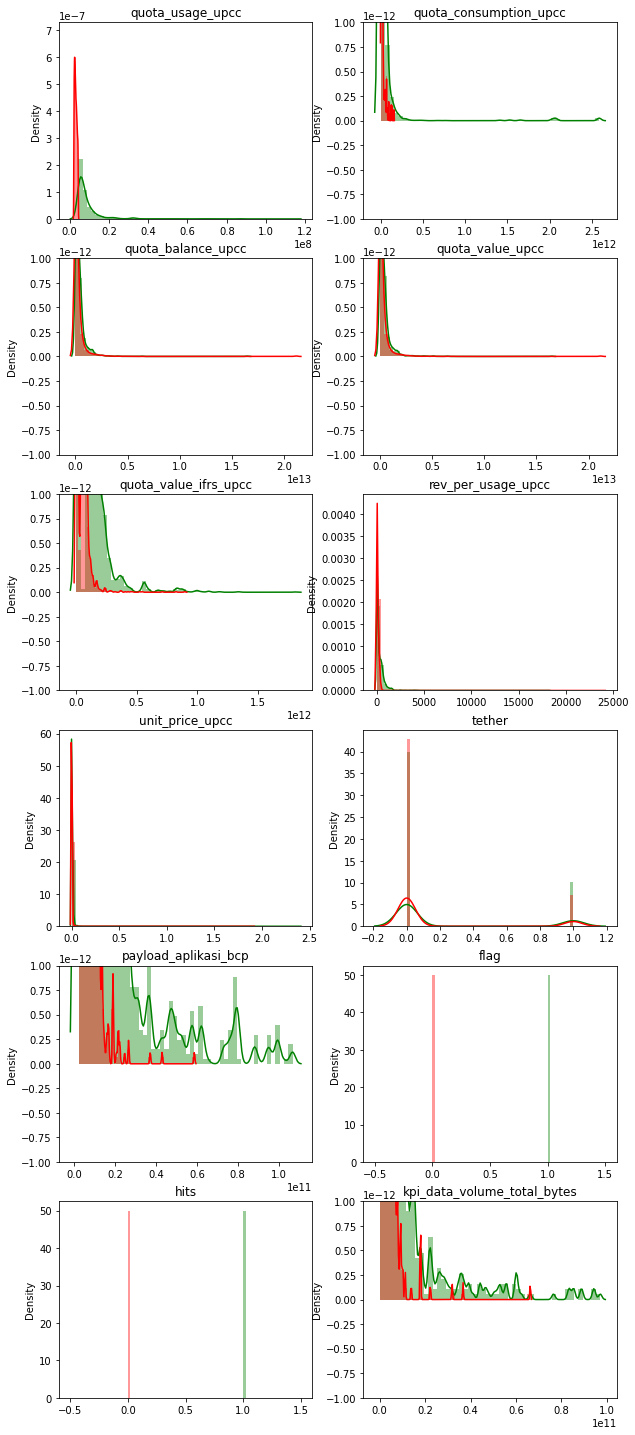

In [25]:
#Looking the V's features
columns = df.iloc[:,12:24].columns

frauds = df.flag == 1
normals = df.flag == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(10,15*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

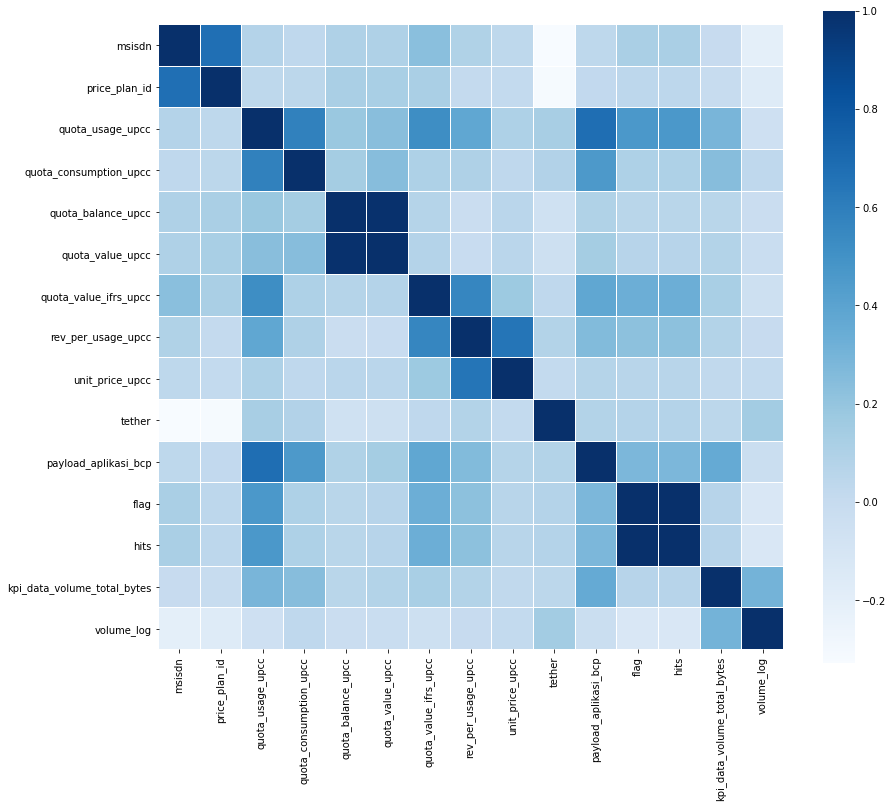

In [26]:
colormap = plt.cm.Blues

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white')
plt.show()

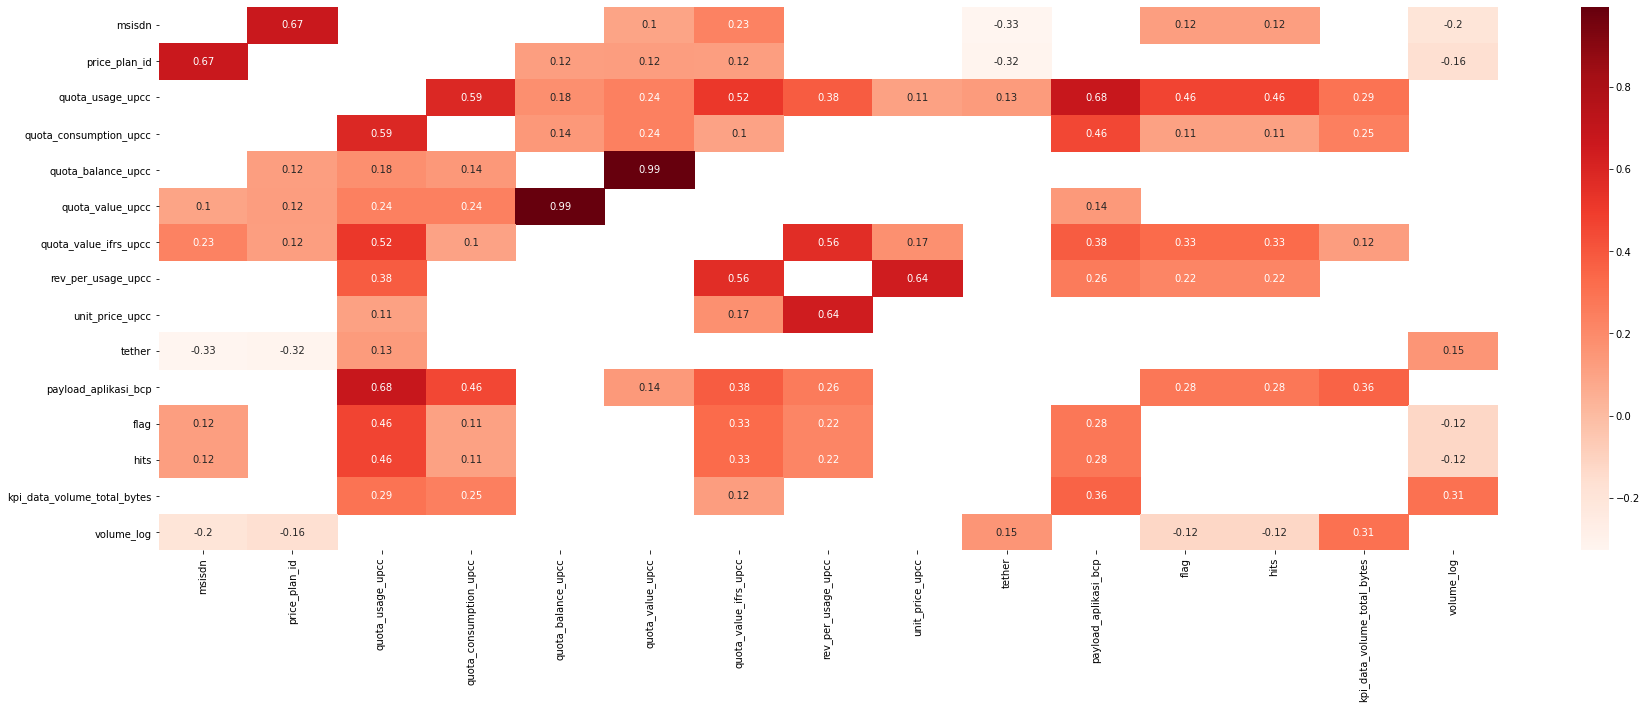

In [27]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [28]:
df_copy = df.copy()
df_copy.drop(['msisdn','price_plan_id','service_name','provinsi','quota_name','price_plan','pckg_id','l1_payu','commercial_name','accessed_category','accessed_app','event_date','price_plan_id','quota_balance_upcc','quota_value_upcc','rev_per_usage_upcc','unit_price_upcc','tether','hits'], axis = 1, inplace = True)

In [29]:
from sklearn import model_selection
df_train,df_test = model_selection.train_test_split(df_copy, test_size = 0.2, stratify = df_copy.flag, random_state = 42)

In [30]:
df_copy.head()

,quota_usage_upcc,quota_consumption_upcc,quota_value_ifrs_upcc,payload_aplikasi_bcp,flag,kpi_data_volume_total_bytes,volume_log
0,2349444,31126164,1.509949e+09,7.219152e+09,0,9.734813e+08,20.696389
1,4110584,234786344,3.114271e+09,3.573171e+09,0,9.734813e+08,20.696389
2,2510854,39879985,1.132462e+09,5.929023e+09,0,1.621200e+04,9.693508
3,2452464,1694439193,1.953497e+10,2.429830e+09,0,9.734813e+08,20.696389
4,2211441,190199707,1.195377e+09,2.151447e+09,0,9.734813e+08,20.696389


In [31]:
print(df_train.flag.value_counts())
print(df_test.flag.value_counts())

0    10139
1     7785
Name: flag, dtype: int64
0    2535
1    1947
Name: flag, dtype: int64


In [32]:
#Cek Outlier :

len(df_train.columns[df_train.columns != 'flag'])

6

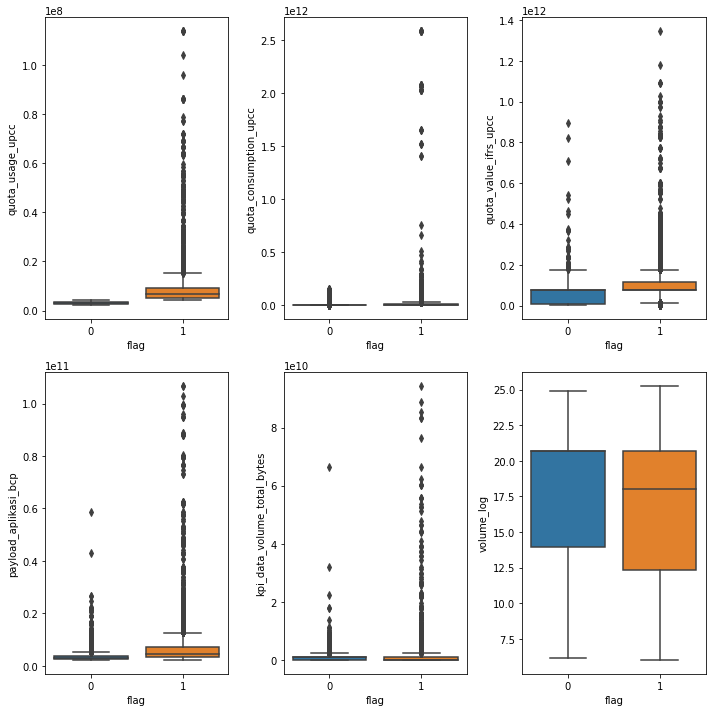

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
rows = 2
cols = 3
index = 0
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (10,10))
columns = df_train.columns[df_train.columns != 'flag']
for i in  range(rows):
    for j in range(cols):
        sns.boxplot(df_copy.flag,columns[index], data=df_train, ax=ax[i,j])
        index = index + 1 
        
        
plt.tight_layout()   

In [34]:
X_train = df_train.iloc[:, df_train.columns != 'flag']
y_train = df_train.flag
X_test = df_test.iloc[:, df_train.columns != 'flag']
y_test = df_test.flag

In [35]:
print(y_train.value_counts())
print(y_test.value_counts())
print(X_train.shape)
print(X_test.shape)

0    10139
1     7785
Name: flag, dtype: int64
0    2535
1    1947
Name: flag, dtype: int64
(17924, 6)
(4482, 6)


In [36]:
from sklearn import metrics 
from sklearn import linear_model 
classifier  = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.49      0.62      2535
           1       0.57      0.89      0.70      1947

    accuracy                           0.66      4482
   macro avg       0.71      0.69      0.66      4482
weighted avg       0.73      0.66      0.65      4482



In [45]:
pip install shap

     |████████████████████████████████| 358kB 7.9MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489402 sha256=4000591cc557f047d1cdf4cbc334c02f4f8a81f2c65a16803e0e98a5f7cc00c1
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [46]:
import shap 